## Import libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
import os
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

## Import dataset

In [2]:
# Import dataset
df = pd.read_csv("Mall_Customers.csv")

## Exploratory data analysis

In [3]:
# view dimensions of the dataset

df.shape

(200, 5)

We can see there are 200 instances and 5 attributes in the data set

In [6]:
# preview the dataset

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# statistical summary of the dataset

df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [10]:
df.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We can see that there are no missing values in the dataset and the data is of the correct type

## Types of variables

In [11]:
# Explore variables in the dataset

# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['Gender']


In [17]:
# view the categorical variables

df[categorical].head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


Summary of categorical variables

(a) There is only one categorical variable

(b) The categorical variable is given by gender

In [12]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [18]:
# view the categorical variables

df[numerical].head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


Summary of numerical variables

(a) There are 4 numerical variables

(b) The numerical variables are given by CustomerID, Age, Annual Income and Spending Score

In [14]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


In [15]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

Female    0.56
Male      0.44
Name: Gender, dtype: float64


C:\Users\Musa Masango\AppData\Local\Temp\ipykernel_17464\1569377904.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))


## Data Visualization

In [20]:
#List of all numeric columns
num = df.select_dtypes('number').columns.to_list()
num

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [23]:
# numeric df
customer_num =  df[num]
customer_num

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


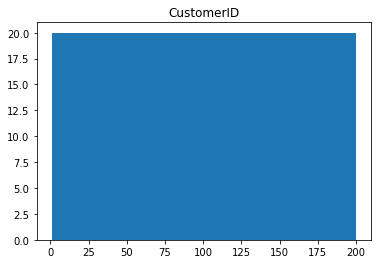

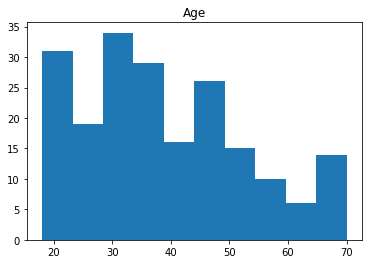

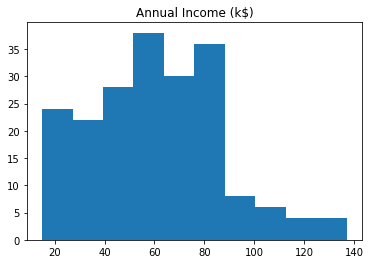

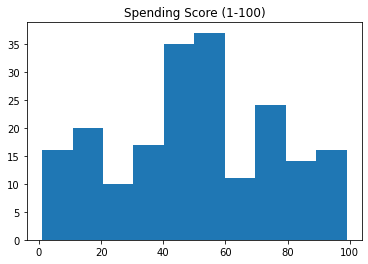

In [24]:
for col in customer_num:
    plt.hist(credit_num[col])
    plt.title(col)
    plt.show()

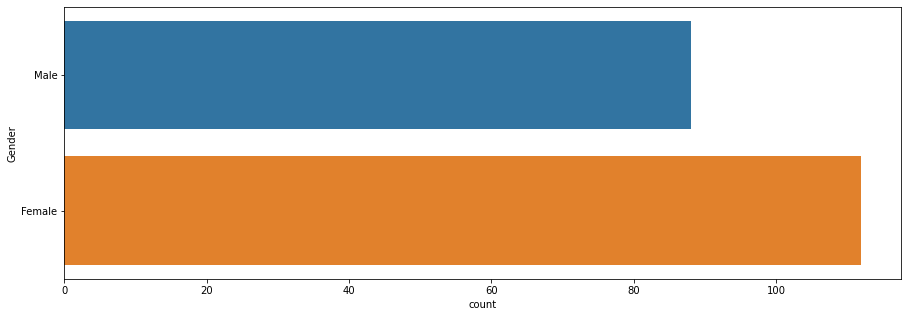

In [174]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

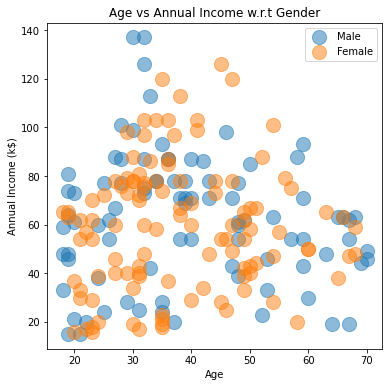

In [175]:
plt.figure(1 , figsize = (6 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

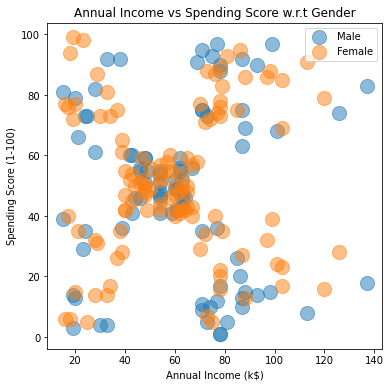

In [176]:
plt.figure(1 , figsize = (6 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

## Correlation Matrix

<AxesSubplot:>

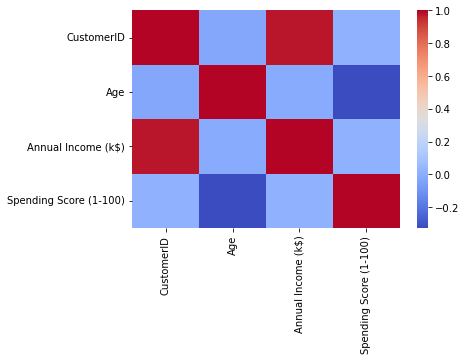

In [28]:
#plotting the correlation matrix
sns.heatmap(df.corr() ,cmap='coolwarm')

In [29]:
#correlation table
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Musa Masango\AppData\Local\Temp\ipykernel_17464\2390052987.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.00,-0.03,0.98,0.01
Age,-0.03,1.00,-0.01,-0.33
Annual Income (k$),0.98,-0.01,1.00,0.01
Spending Score (1-100),0.01,-0.33,0.01,1.00


In [ ]:
It is evident from the above correlation matrix that the column CustomerID has the highest correlation with the Annual Income(a positive correlation of 0.98). 

## Clustering using kmeans 

In [147]:
# Segmentation using Age and Spending Score
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
sse = []
list_n = list(range(1, 10))
for n in list_n:
    km_1 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    km_1.fit(X1)
    labels1 = km_1.labels_
    centroids1 = km_1.cluster_centers_
    sse.append(km_1.inertia_)

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[176108.77999999997, 87121.56591478697, 59486.96143928035, 39529.8879673635, 31651.380885243794, 25399.022004416984, 21872.452233806238, 18898.07024826247, 16272.835724852315]


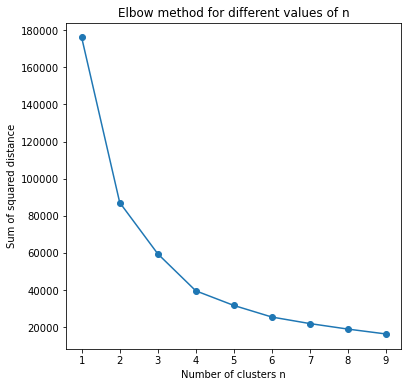

In [178]:
# Plot sse against n
plt.figure(figsize=(6, 6))
plt.plot(list_n, sse, '-o')
plt.xlabel('Number of clusters n')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for different values of n')
;
print(sse)

In [179]:
# finding the optimal value of n for which the curve changes curvature using the elbow method
from kneed import KneeLocator 
nl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
n_optimal = nl.elbow
print(f'The optimal value of n = {n_optimal}')

The optimal value of n = 3


Interpretation 

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

In [180]:
# calculate the silhoutte score for 2, 3 and 4 clusters
for i, k in enumerate([2, 3, 4]):
    # Run the Kmeans algorithm
    km_1 = KMeans(n_clusters=k)
    km_1.fit(X1)
    labels1 = km_1.labels_
    centroids1 = km_1.cluster_centers_
    # Get silhouette samples
    silhouette_vals1 = silhouette_samples(X1, labels)
    # average silhouette score
    avg_score1 = np.mean(silhouette_vals1)
    max_avg_score1 = np.max(avg_score1)
print(f'The best average score of the silhouette score is max_avg_score = {max_avg_score1} and the corresponding value is k = {k}')

The best average score of the silhouette score is max_avg_score = 0.49973941540141753 and the corresponding value is k = 4


Interpretation

Silhouette analysis can be used to determine the degree of separation between clusters. 

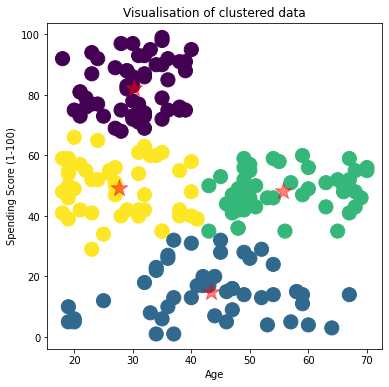

In [181]:
plt.figure(1 , figsize = (6 , 6) )
plt.clf()
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , marker = '*' ,alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.title('Visualisation of clustered data')
plt.show()

In [182]:
# Segmentation using Annual Income and Spending Score
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
sse = []
list_n = list(range(1, 10))
for n in list_n:
    km_2 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    km_2.fit(X2)
    labels2 = km_2.labels_
    centroids2 = km_2.cluster_centers_
    sse.append(km_2.inertia_)

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37239.83554245604, 30259.65720728547, 25018.781613414074, 21862.092672182887]


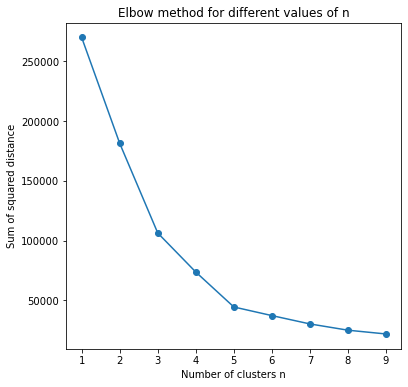

In [186]:
# Plot sse against n
plt.figure(figsize=(6, 6))
plt.plot(list_n, sse, '-o')
plt.xlabel('Number of clusters n')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for different values of n');
print(sse)

In [155]:
# finding the optimal value of n for which the curve changes curvature using the elbow method
from kneed import KneeLocator 
nl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
n_optimal = nl.elbow
print(f'The optimal value of is n = {n_optimal}')

The optimal value of is n = 4


In [167]:
# calculate the silhoutte score for 2, 3 and 4 clusters
for i, n in enumerate([2, 3, 4]):
    # Run the Kmeans algorithm
    km_2 = KMeans(n_clusters=k)
    km_2.fit(X2)
    labels2 = km_2.labels_
    centroids2 = km_2.cluster_centers_
    # Get silhouette samples
    silhouette_vals2 = silhouette_samples(X2, labels)
    # average silhouette score
    avg_score2 = np.mean(silhouette_vals2)
    max_avg_score2 = np.max(avg_score2)
print(f'The best average score of the silhouette score is max_avg_score = {max_avg_score2} and the corresponding value is n = {n}')

The best average score of the silhouette score is max_avg_score = 0.08901800691337511 and the corresponding value is n = 4


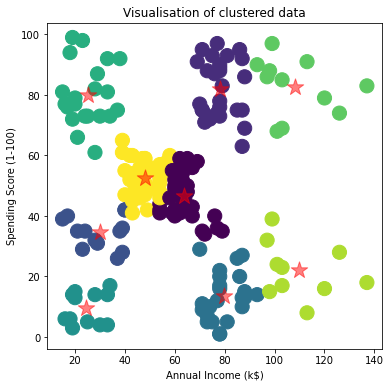

In [187]:
plt.figure(1 , figsize = (6 , 6) )
plt.clf()
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , marker = '*' ,alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.title('Visualisation of clustered data')
plt.show()

In [159]:
# Segmentation using Age, Annual Income and Spending Score
X3 = df[['Age', 'Annual Income (k$)']].iloc[: , :].values
sse = []
list_n = list(range(1, 10))
for n in list_n:
    km_3 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    km_3.fit(X3)
    labels3 = km_3.labels_
    centroids3 = km_3.cluster_centers_
    sse.append(km_3.inertia_)

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37239.83554245604, 30259.65720728547, 25018.781613414074, 21862.092672182887]


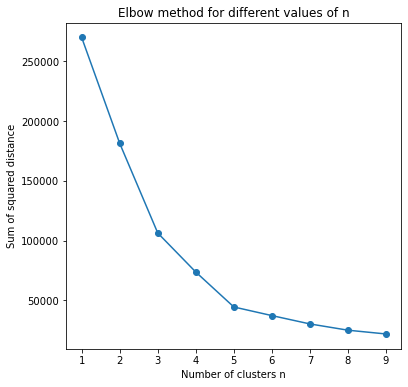

In [189]:
# Plot sse against n
plt.figure(figsize=(6, 6))
plt.plot(list_n, sse, '-o')
plt.xlabel('Number of clusters n')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for different values of n')
;
print(sse)

In [161]:
# finding the optimal value of n for which the curve changes curvature using the elbow method
from kneed import KneeLocator 
nl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
n_optimal = nl.elbow
print(f'The optimal value of is n = {n_optimal}')

The optimal value of is n = 3


In [190]:
# calculate the silhoutte score for 2, 3 and 4 clusters
for i, n in enumerate([2, 3, 4]):
    # Run the Kmeans algorithm
    km_3 = KMeans(n_clusters=k)
    km_3.fit(X3)
    labels3 = km_3.labels_
    centroids3 = km_3.cluster_centers_
    # Get silhouette samples
    silhouette_vals3 = silhouette_samples(X3, labels)
    # average silhouette score
    avg_score3 = np.mean(silhouette_vals3)
    max_avg_score3 = np.max(avg_score3)
print(f'The best average score of the silhouette score is max_avg_score = {max_avg_score3} and the corresponding value is n = {n}')

The best average score of the silhouette score is max_avg_score = 0.10014431359011682 and the corresponding value is n = 4


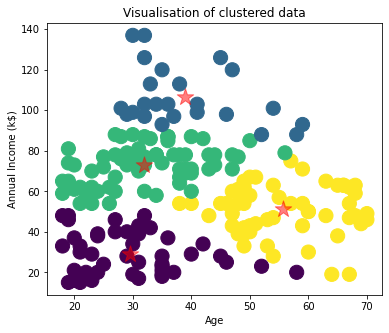

In [192]:
plt.figure(1 , figsize = (6 , 5) )
plt.clf()
plt.scatter(x = 'Age' ,y = 'Annual Income (k$)', data = df , c = labels3 , 
            s = 200 )
plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'red' , marker = '*' ,alpha = 0.5)
plt.xlabel('Age') , plt.ylabel('Annual Income (k$)')
plt.title('Visualisation of clustered data')
plt.show()

In [193]:
score = [max_avg_score1,max_avg_score2,max_avg_score3]
Models = pd.DataFrame({
    'Models': ["Age vs Spending Score (1-100)","Annual Income (k$) vs Spending Score (1-100)","Age vs Annual Income (k$)"],
    'Score': score})
Models.sort_values('Score', ascending=True)

,Models,Score
1,Annual Income (k$) vs Spending Score (1-100),0.089018
2,Age vs Annual Income (k$),0.100144
0,Age vs Spending Score (1-100),0.499739


We can see that the best relationship is between the Age and Spending Score (1-100) having an Silhouette score of 0.499739

Interpretation

As the above table shows, the age vs spending score (1-100) relation has the best average silhouette score of around 0.499739, however, when we consider the other relations, the average silhouette score decreased dramatically to around 0.100144 and 0.089018 respectively.